# Final Project

## Metric

## Datasets

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
from IPython.core.display import display, HTML
%matplotlib inline

In [3]:
#https://data.wprdc.org/dataset/city-of-pittsburgh-signalized-intersections
trafficLights = pd.read_csv("https://data.wprdc.org/datastore/dump/79ddcc74-33d2-4735-9b95-4169c7d0413d")

In [ ]:
#https://data.wprdc.org/dataset/city-traffic-signs

In [3]:
trafficLights

,id,name,description,flash_time,flash_yellow,operation_type,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1233506574,TS1,Aiken Ave - Baum Blvd,24 Hr stop and go,NaN,Fully Actuated,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-23,40.456941,-79.938539
1,322808398,TS10,Alexander St - Steuben St,24 Hr stop and go,NaN,Semi Actuated,West End,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.441993,-80.034544
2,1626189126,TS100,Beeler St - Forbes Ave,24 Hr stop and go,NaN,Semi Actuated,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.443890,-79.938799
3,2085487046,TS101,Beeler St - Wilkins Ave,00:00 - 06:00,NaN,Fixed,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.445636,-79.931220
4,1187990770,TS102,Bellefield Ave - Fifth Ave,24 Hr stop and go,FIFTH AVE,Fixed,North Oakland,8.0,4.0,4.200304e+10,3.0,4.0,4.0,2-7,40.446484,-79.951914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,994278722,TS9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,1113074895,TSF153,Shady Alder RRFB,NaN,NaN,NaN,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-11,40.456814,-79.922437
776,1150087908,TS718,Butler St - 39th St,NaN,NaN,NaN,Lower Lawrenceville,7.0,6.0,4.200306e+10,2.0,6.0,2.0,3-3,40.467554,-79.963717
777,1741138031,TS723,NaN,NaN,NaN,NaN,Strip District,7.0,2.0,4.200302e+10,6.0,2.0,2.0,2-3,40.448705,-79.989339


## Water Features

In [28]:
#https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7
waterFeatures = pd.read_csv("https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7")
#Filter out only spray parks
query_mask = waterFeatures["feature_type"] != "Drinking Fountain"
waterDecor = waterFeatures[query_mask]
#Get number of fountains per neighborhood
waterDecor = waterDecor['neighborhood'].value_counts()
waterDecor = waterDecor.to_frame()

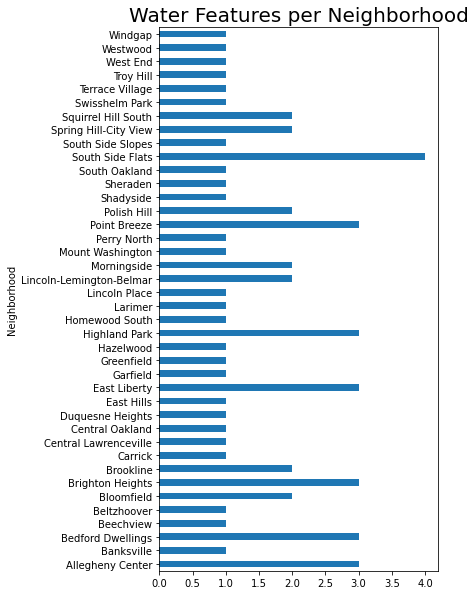

In [29]:
#https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a
waterPools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")
#Get number of water features per neighborhood
waterPools = waterPools['neighborhood'].value_counts()
waterPools = waterPools.to_frame()
#Concatenate the two datasets to get the sum of all relevant water features
water = [waterDecor, waterPools]
water = pd.concat(water)
#Get rid of duplicate indices, sort values, and rename column
water = water.groupby(level=0).sum()
water.sort_values(by = "neighborhood")
water = water.rename(columns = {"neighborhood" : "water_features"})
#Plot 
waterPlot = water.plot(kind = "barh", figsize = (5,10), title = "Water Features per Neighborhood", fontsize = 10, ylabel = "Neighborhood", legend = False)
waterPlot.axes.title.set_size(20)
#This statistic has a negative correlation with the main metric, so I need to go in and make the values negative
water["water_features"] *= -1

In [30]:
#Set neighborhoods in water df as another column so they can be added to graph
water = water.reset_index()

In [31]:
water = water.rename(columns = {"index" : "neighborhood"})
water.head(5)

,neighborhood,water_features
0,Allegheny Center,-3
1,Banksville,-1
2,Bedford Dwellings,-3
3,Beechview,-1
4,Beltzhoover,-1


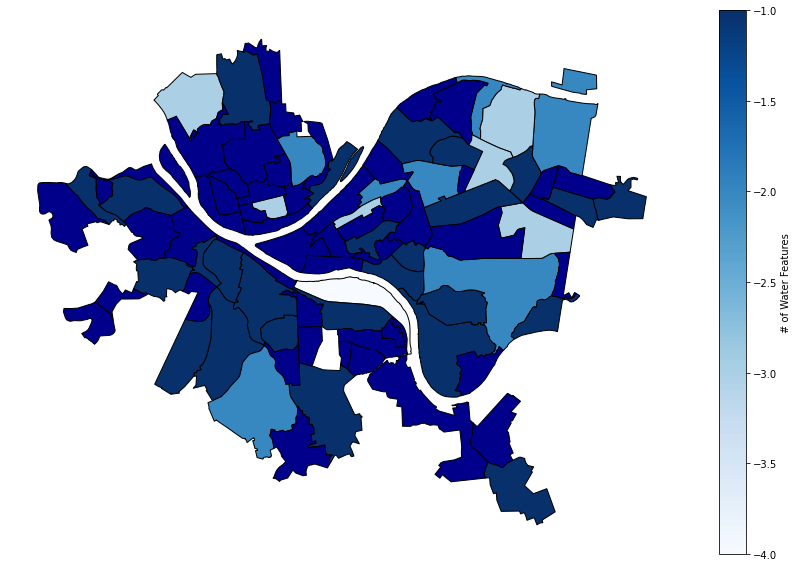

In [33]:
#Get shapefile for Pittsburgh neighborhoods
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
geomap = neighborhoods.merge(water, how='outer', left_on='hood', right_on='neighborhood')
geomap.fillna(0)
water_geoplot = geomap.plot(column='water_features', edgecolor="black", cmap='Blues', legend=True,
                            legend_kwds={'label': "# of Water Features"}, figsize=(15, 10), missing_kwds = {"color" : "darkblue"})
water_geoplot.set_axis_off();

## Traffic Signs

Panthers hate having to stop from moving in their day to day lives.

In [61]:
# Reading in the CSV data
cityTrafficSigns = pd.read_csv("https://data.wprdc.org/datastore/dump/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c")

In [62]:
cityTrafficSignals

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74706,137646049,210,715,E Carson St,Pittsburgh,Metal Pole,NaN,Pay Parking,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428686,-79.991666
74707,261881880,PS-Snow,756,E Carson St,Pittsburgh,Metal Pole,NaN,Emergency Snow Route,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428601,-79.991250
74708,567930755,R4-11,754,E Carson St,Pittsburgh,Metal Pole,NaN,Bicycles May Use Full Lane,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428593,-79.991261
74709,1561469039,2,727,E Carson St,Pittsburgh,Channel,NaN,No Parking Anytime,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428701,-79.991235


Here I am going to go over the recorded Stops and Yields

In [67]:
# Creating query masks to get the rows including stop signs and yields.
stopSigns = cityTrafficSigns['description'] == "Stop"
yieldSigns = cityTrafficSigns['description'] == "Yield"
# Creating two new data frames using the query masks above
trafficStopsOnly = cityTrafficSigns[stopSigns]
trafficYieldsOnly = cityTrafficSigns[yieldSigns]

In [68]:
# Grouping the data frames according to neighborhood, then getting the counts of all the columns and pulling out the description column as a series
trafficStops = trafficStopsOnly.groupby("neighborhood").count()["description"]
trafficYields = trafficYieldsOnly.groupby("neighborhood").count()["description"]

In [69]:
trafficStops

neighborhood
Allegheny Center        8
Allegheny West         19
Allentown              73
Arlington              57
Arlington Heights       4
                       ..
Upper Lawrenceville    70
West End               16
West Oakland           35
Westwood               94
Windgap                37
Name: description, Length: 91, dtype: int64

In [70]:
trafficYields

neighborhood
Allegheny West                3
Allentown                     1
Bedford Dwellings             1
Beechview                     2
Beltzhoover                   1
Bloomfield                    3
Bluff                         2
Bon Air                       1
Brighton Heights              8
Brookline                     2
California-Kirkbride          3
Central Business District    10
Central Lawrenceville         2
Central Oakland               1
Chateau                       4
Crawford-Roberts              3
Duquesne Heights              3
East Liberty                  1
Elliott                       1
Esplen                        1
Fairywood                     3
Fineview                      1
Greenfield                    5
Hays                         13
Highland Park                10
Knoxville                     1
Lincoln-Lemington-Belmar      2
Lower Lawrenceville           5
Marshall-Shadeland            3
Morningside                   2
Mount Washington           

There are fewer records of yield signs in traffic. To remove the effect of the minimally recorded traffic signs, I will give less weight to the yield signs in comparison to the stop signs.

In [71]:
trafficYields = trafficYields*0.2
trafficStops =trafficStops*0.8

In [73]:
trafficSigns = pd.concat([tSN.rename("Stops"), tYN.rename("Yields")], axis=1).fillna(0)
trafficSigns["Total"] = trafficSigns["Stops"] + trafficSigns["Yields"]

In [77]:
trafficSigns.sort_values('Total', inplace=True, ascending=False)
trafficSigns

,Stops,Yields,Total
neighborhood,,,
Brookline,279.2,0.4,279.6
Carrick,249.6,0.0,249.6
South Side Flats,233.6,1.0,234.6
Squirrel Hill South,205.6,3.2,208.8
Highland Park,181.6,2.0,183.6
...,...,...,...
Allegheny Center,6.4,0.0,6.4
St. Clair,4.8,0.0,4.8
South Shore,4.0,0.2,4.2


Text(0, 0.5, 'Neighborhoods')

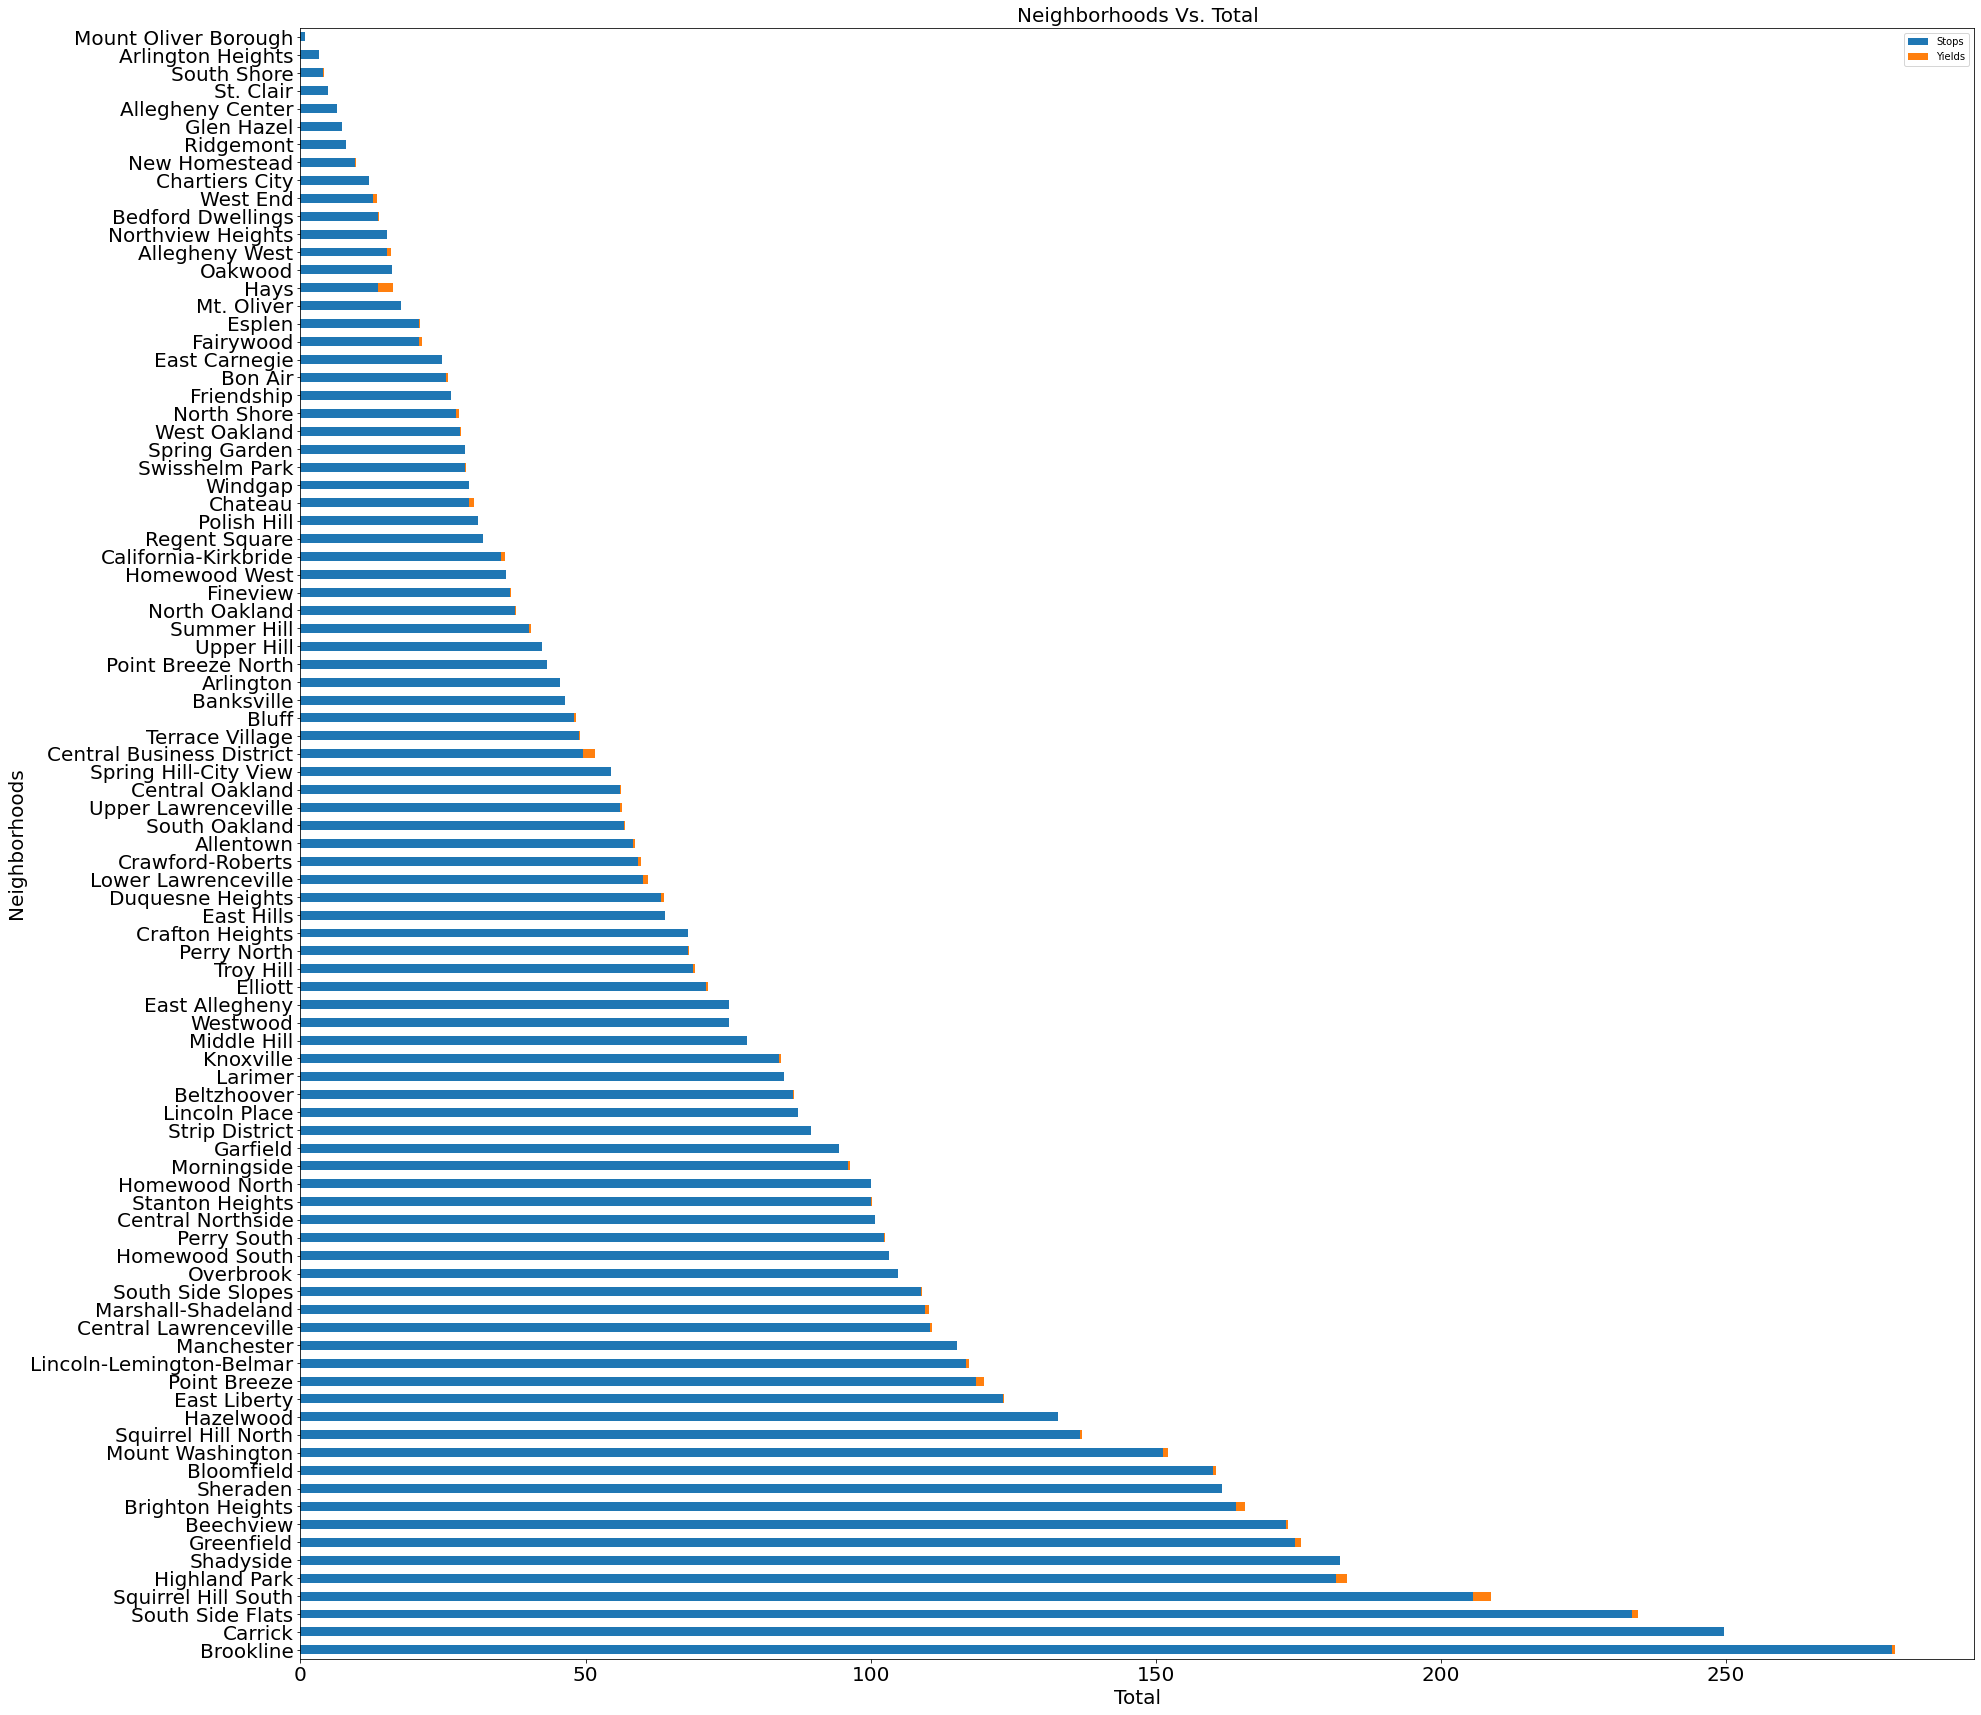

In [79]:
trafficSigns[['Stops', 'Yields']].plot(kind='barh', stacked=True, figsize=(30, 30), fontsize=20)
plt.title("Neighborhoods Vs. Total", fontsize=20)
plt.xlabel("Total", fontsize=20)
plt.ylabel("Neighborhoods", fontsize=20)